<center><h1>YouTube comments analysis</h1></center>

<h2>1. Aims, background and data.</h2>

<h3>1.1 Introduction</h3>

In the age of digital media, platforms like YouTube have become integral parts of our daily lives, offering a vast array of content spanning from educational tutorials to entertaining vlogs. Among the various metrics that quantify the success and engagement of YouTube videos, comments play a pivotal role in gauging audience interaction and feedback. Understanding the dynamics of comments and their correlations with other metrics such as views and likes is essential for content creators, marketers, and platform analysts alike.

This data analysis project aims to test the hypothesis that, on average, shorter comments receive more likes than longer ones. I believe that this is because people are simply too lazy to read lengthy comments. I would like to check if there is a correlation between the average length of all comments and the average length of "top" comments. Additionally, I am certain that positive comments will have more likes than negative ones. It seems obvious why this is the case, but I would like to know how large the gap is and whether it varies among different channels.

Different YouTube channels have different audiences, therefore I will take 5 channels and compare how different the results are. I will take 5 channels from 5 spheres: chess, gaming, IT, food, travel. GothamChess, Asmongold TV, ColdFusion, Joshua Weissman, and Doug Barnard accordingly.


<h3>1.2 Background</h3>

There are several projects that conduct multi-factor analyses of YouTube videos, considering various factors such as the content of the video, the number of views, likes, titles, etc. However, I have not come across any analysis of the length of comments in relation to their like counts or any other kind of analysis of comment nature. Therefore, for my project, I will focus on three factors: the comment itself, its length, and the number of likes it receives. I will use these three variables as data sources for my analysis.

The audiences of different YouTube channels may be different, but this is not a concern for me. Some of my goals are aimed at identifying differences between channels, and I hope to discover interesting and unique features of each channel.

<h3>1.3 Aims and objectives</h3>

My analysis will be based on comments from five channels: Gotham Chess, Asmongold TV, Cold Fusion, Joshua Weissman, and Doug Barnard.

**In the scope of this project, I aim to investigate the following:**
* What is the average length of comments in each channel?
* What is the average length of the most popular comments in each channel?
* Is it true that, on average, shorter comments are more popular than longer ones?
* Is it true that more popular comments contain more unique words?
* Is it true that positive comments receive more likes on average than negative comments?

I assume that the popularity of a comment is proportional to the number of likes it receives.

I will use sentence length to calculate the mean. I will create subsets using filters based on like count. Plots and charts will be used to visualize the data and discover patterns. Frequency and sentiment analysis will be applied to the comments.


<h3> 1.4 Ethical considerations </h3>

YouTube is an open platform that allows users to freely share and comment on each other's content. Since all data, including user information, is publicly available, it is not necessary to anonymize it. However, in order to avoid any misunderstandings and respect users' privacy rights, I will not use their nicknames in my analysis. Additionally, since I will only be analyzing the sentiment of comments and not the content itself, there is no risk of discrimination or making dangerous assumptions. 


<h3> 1.5 Plan </h3>

**Plan which I will follow:**
* Take 5 latest videos from each of 5 channels and download comments from them via YouTube API. 
* Clean and preprocess the data to make it easy to transform into a pandas dataframe with 3 columns.
* Conduct exploratory data analysis using graphs and charts.
* Get answers on stated questions and prove or disprove my theories.


<h3> 1.6 Data </h3>

YouTube is the largest video hosting platform, generating a vast amount of data, including comments, every day. In addition, it has a user-friendly API that allows me to interact directly with its data. Due to its popularity, variety of data, and ease of data extraction, there are few other platforms that can compare to it. Therefore, this platform is ideal for my project.

I will be taking comments from the 5 most recent videos on each channel. In total, I will have approximately 4,500, 1,700, 9,500, 9,500 and 2,000 comments for the 5 channels listed. Some of the channels may not have as many comments as others, but I believe that for my purposes, these comment counts are sufficient.

However, the fact that I only download the latest 5 videos has an impact on the quality of my data. Ideally, I would download comments from a larger number of videos to ensure that my data is more representative, less likely to change due to audience shifts and make conclusions less likely to change over time.

More datasets can be collected using other sources and platforms, such as Instagram and Twitter. This would allow us to identify more general patterns and make more accurate conclusions. However, it would not be as straightforward as with YouTube to determine which comments are the most popular on these platforms. Nevertheless, I believe the data I have collected is sufficient to provide a good approximation of unbiased statistics with minimal varience.

I will be using YouTube api to download comments and its corresponding number of likes. Once they are downloaded, I will save them in a csv file locally to be able to work with them later without starting downloading all over again.


In [1]:
# disable unnecessary output
import warnings
warnings.filterwarnings('ignore')

# libraries to word with data
import json
import pandas as pd

# library for load bar
from tqdm import tqdm

# libraries for interaction with API 
from apiclient.discovery import build
from urllib.parse import urlparse, parse_qs

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# libraty for Hugging Face model load
from transformers import pipeline

# word processing library
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\1\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

<h1> 2. Downloading comments </h1>

My YouTube API key and URLs of videos are stored in the creds.json and video_urls.json files. These files will be used to make requests to the YouTube API. All the necessary functions for downloading are written below.

In [2]:
def get_keys(filename):
    '''
    To get youtube API key from the specified json file
    '''
    with open(filename) as f:
        key = f.readline()
    DEVELOPER_KEY = key
    YOUTUBE_API_SERVICE_NAME = "youtube"
    YOUTUBE_API_VERSION = "v3"
    return {'key': key, 'name': 'youtube', 'version': 'v3'}

In [3]:
def build_service(filename):
    '''
    To build the YouTube API service
    '''
    with open(filename) as f:
        key = f.readline()
    YOUTUBE_API_SERVICE_NAME = "youtube"
    YOUTUBE_API_VERSION = "v3"
    return build(YOUTUBE_API_SERVICE_NAME,
                 YOUTUBE_API_VERSION,
                 developerKey=key)

In [4]:
def get_id(url):
    '''
    To get the video id from the video url
    '''
    u_pars = urlparse(url)
    quer_v = parse_qs(u_pars.query).get('v')
    if quer_v:
        return quer_v[0]
    pth = u_pars.path.split('/')
    if pth:
        return pth[-1]

In [5]:
def save_to_csv(output_dict, filename):
    '''
    To save the comments + other columns to the csv file specified with name
    '''
    output_df = pd.DataFrame(output_dict, columns = output_dict.keys())
    output_df.to_csv(f'data/{filename}.csv')

In [6]:
def comments_helper(video_IDs, api_key_file, service):
    '''
    To download comments and other data and put it in a dict
    '''
    # put comments extracted in specific lists for each column
    comments, likesCount = [], []
    for video_ID in video_IDs:
        #get the first response from the YT service
        response = service.commentThreads().list(
           part="snippet",
           videoId = video_ID,
           textFormat="plainText").execute()

        page = 0
        while True:
            page += 1
            index = 0
            # for every comment in the response received
            for item in response['items']:
                index += 1
                comment = item["snippet"]["topLevelComment"]
                text = comment["snippet"]["textDisplay"]
                like_count = item['snippet']['topLevelComment']['snippet']['likeCount']
                # append the comment to the lists
                comments.append(text)
                likesCount.append(like_count)
            # get next page of comments
            if 'nextPageToken' in response:
                response = service.commentThreads().list(part="snippet",
                videoId = video_ID,
                textFormat="plainText",
                pageToken=response['nextPageToken']
                ).execute()
            else: # if no response is received, break
                break
        
    # return a dict with comments and like counts from all videos
    return dict({'comment' : comments, 'like_count' : likesCount})

In [7]:
def get_comments(channel_name, video_urls, api_key_file):
    '''
    To call comments_helper for videos in video_urls
    and save result in a csv file
    '''
    # build the service for YT API
    yt_service = build_service(api_key_file)
    video_IDs = []
    for video_url in video_urls:
        # extract video id
        video_IDs.append(get_id(video_url))
        
    # get the comments
    comments_dict = comments_helper(video_IDs, api_key_file, yt_service)
    # save the output dict to storage as a csv file
    save_to_csv(comments_dict, channel_name)
    
    print(channel_name)
    for video_url in video_urls:
        print(f'Done for {video_url}')

In [8]:
api_key_path = 'data\\creds.json'
with open('data\\video_urls.json') as f:
    urls_dict = json.load(f)
    for channel_name, video_urls in urls_dict.items():
        get_comments(channel_name, video_urls, api_key_path)

GothamChess
Done for https://www.youtube.com/watch?v=sqlT26ETY5k
Done for https://www.youtube.com/watch?v=cNhBgSMNltk
Done for https://www.youtube.com/watch?v=qzFmDETho-A
Done for https://www.youtube.com/watch?v=wE0LxkYpBjQ
Done for https://www.youtube.com/watch?v=DgDHRXphEyE
Asmongold TV
Done for https://www.youtube.com/watch?v=qPpLieW2Ux4
Done for https://www.youtube.com/watch?v=dMuKf5npn-I
Done for https://www.youtube.com/watch?v=J0jy9Xck3j0
Done for https://www.youtube.com/watch?v=fwg_RtMcI2Y
Done for https://www.youtube.com/watch?v=tmcmQymvblg
ColdFusion
Done for https://www.youtube.com/watch?v=wgvHnp9sbGM
Done for https://www.youtube.com/watch?v=pkYA4rALqEE
Done for https://www.youtube.com/watch?v=vQChW_jgMMM
Done for https://www.youtube.com/watch?v=9nxXKqK_xWs
Done for https://www.youtube.com/watch?v=VAtoqAQ2aEg
Joshua Weissman
Done for https://www.youtube.com/watch?v=z8Otk01Xi-U
Done for https://www.youtube.com/watch?v=jVyJMz5nLd8
Done for https://www.youtube.com/watch?v=QovocB

<h1> 3. Data preprocessing </h1>

<h2> 3.1 Load saved data </h2>

As time passes, new comments are added, old ones are changed, and the number of likes on the comments increases. In order to ensure the reproducibility of my results and to be able to work with the same data over time, I will use the downloaded data from this point forward in my project.

In [15]:
df_GothamChess = pd.read_csv('data/GothamChess.csv')
df_JoshuaWeissman = pd.read_csv('data/Joshua Weissman.csv')
df_DougBarnard = pd.read_csv('data/Doug Barnard.csv')
df_ColdFusion = pd.read_csv('data/ColdFusion.csv')
df_AsmongoldTV = pd.read_csv('data/Asmongold TV.csv')

Let's name dataframes for convenience of output later.

In [16]:
df_GothamChess.name = 'GothamChess'
df_JoshuaWeissman.name = 'Joshua Weissman'
df_DougBarnard.name = 'Doug Barnard'
df_ColdFusion.name = 'ColdFusion'
df_AsmongoldTV.name = 'Asmongold TV'

<h2> 3.2 Clean and create </h2>

Now, we need to form a proper dataframe, remove NaNs, and create a new column called "comment_len". The number in "comment_len" will be equal to the number of characters in the corresponding comment. Also, for the sentiment analysis, I will need a polarity scores for comments. For this purpose two new columns will be formed. "polarity_score_1" is scores of NLTK SentimentIntensityAnalyzer model, and "polarity_score_2" is scores of Hugging Face sentiment-analysis model.

In [17]:
def preproces(df):
    # set new index coumn and delete name for it
    new_df = df.set_index('Unnamed: 0')
    new_df.index.name = None
    
    # delete all nulls
    new_df = new_df.dropna()
    
    # creare new column of comment lengths
    new_df['comment_len'] = new_df['comment'].str.len().astype(int)
    
    # set name to a dataframe for future convenience
    new_df.name = df.name
    
    return new_df

In [18]:
def sentiment_analysis(df):
    print(df.name, 'sentiment analysis')    
    
    new_df = df
    sia = SentimentIntensityAnalyzer()

    print('polarity_score_1 analysis')
    scores = [] # list of polarity scores of comments of nltk model
    for comment in tqdm(new_df['comment']):
        scores.append(sia.polarity_scores(comment)['compound'])

    # create new column of polarity scores of comments of nltk model
    new_df['polarity_score_1'] = pd.Series(scores)
    
    
    sia = pipeline("sentiment-analysis")
    
    print('polarity_score_2 analysis')
    scores = [] # list of polarity scores of comments of Hugging Face model
    for comment in tqdm(new_df['comment']):
        # HF model cannot analyse text with more than 512 characters
        if len(comment) < 512: 
            ans = sia(comment)[0]
            if ans['label'] == 'POSITIVE':
                scores.append(ans['score'])
            else:
                scores.append(-ans['score'])
        else:
            # if comments is longer than 512 characters, set score to 0
            scores.append(0)
            
    # create new column of polarity scores of comments of Hugging Face model
    new_df['polarity_score_2'] = pd.Series(scores)
    
    return new_df

Let's take a look at how many comments we have for each channel.

In [19]:
def print_number_of_comments(df):
    print(df.name, len(df), 'comments')

In [20]:
print_number_of_comments(df_GothamChess)
print_number_of_comments(df_JoshuaWeissman)
print_number_of_comments(df_DougBarnard)
print_number_of_comments(df_ColdFusion)
print_number_of_comments(df_AsmongoldTV)

GothamChess 4804 comments
Joshua Weissman 10851 comments
Doug Barnard 2155 comments
ColdFusion 9600 comments
Asmongold TV 4431 comments


That is how a DataFrame looks before.

In [21]:
df_GothamChess.head()

,Unnamed: 0,comment,like_count
0,0,Whatever happened to our favorite onlind serie...,0
1,1,"Make more please, I enjoyed the vid & experien...",0
2,2,"Hey Levi, I really love the longer and calmer ...",1
3,3,“This is the 30 second episode” nice try levy,0
4,4,Blunder queen into resign is a true combo,0


Preprocess

In [22]:
df_GothamChess = preproces(df_GothamChess)
df_JoshuaWeissman = preproces(df_JoshuaWeissman)
df_DougBarnard = preproces(df_DougBarnard)
df_ColdFusion = preproces(df_ColdFusion)
df_AsmongoldTV = preproces(df_AsmongoldTV)

Add polarity scores of two models.

In [23]:
df_GothamChess = sentiment_analysis(df_GothamChess)
df_JoshuaWeissman = sentiment_analysis(df_JoshuaWeissman)
df_DougBarnard = sentiment_analysis(df_DougBarnard)
df_ColdFusion = sentiment_analysis(df_ColdFusion)
df_AsmongoldTV = sentiment_analysis(df_AsmongoldTV)

GothamChess sentiment analysis
polarity_score_1 analysis


100%|██████████| 4801/4801 [00:00<00:00, 8510.45it/s]
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


polarity_score_2 analysis


100%|██████████| 4801/4801 [04:50<00:00, 16.55it/s]


Joshua Weissman sentiment analysis
polarity_score_1 analysis


100%|██████████| 10851/10851 [00:02<00:00, 5136.99it/s]
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


polarity_score_2 analysis


100%|██████████| 10851/10851 [11:05<00:00, 16.31it/s]


Doug Barnard sentiment analysis
polarity_score_1 analysis


100%|██████████| 2153/2153 [00:00<00:00, 8575.76it/s]
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


polarity_score_2 analysis


100%|██████████| 2153/2153 [02:14<00:00, 15.96it/s]


ColdFusion sentiment analysis
polarity_score_1 analysis


100%|██████████| 9598/9598 [00:02<00:00, 4465.20it/s]
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


polarity_score_2 analysis


100%|██████████| 9598/9598 [09:24<00:00, 17.00it/s]


Asmongold TV sentiment analysis
polarity_score_1 analysis


100%|██████████| 4430/4430 [00:00<00:00, 4589.63it/s]
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


polarity_score_2 analysis


100%|██████████| 4430/4430 [04:22<00:00, 16.90it/s]


<h2> 3.3 Check everything is correct </h2>

Check that there are no NaNs left in the dataframes.

In [27]:
assert df_GothamChess.isnull().any().all() == False 
assert df_JoshuaWeissman.isnull().any().all() == False
assert df_DougBarnard.isnull().any().all() == False 
assert df_ColdFusion.isnull().any().all() == False 
assert df_AsmongoldTV.isnull().any().all() == False

Check that all comment lengths are greater than zero.

In [28]:
assert (df_GothamChess['comment_len'] > 0).all() == True
assert (df_JoshuaWeissman['comment_len'] > 0).all() == True
assert (df_DougBarnard['comment_len'] > 0).all() == True
assert (df_ColdFusion['comment_len'] > 0).all() == True
assert (df_AsmongoldTV['comment_len'] > 0).all() == True

Let's see how many valid comments are left.

In [29]:
print_number_of_comments(df_GothamChess)
print_number_of_comments(df_JoshuaWeissman)
print_number_of_comments(df_DougBarnard)
print_number_of_comments(df_ColdFusion)
print_number_of_comments(df_AsmongoldTV)

GothamChess 4801 comments
Joshua Weissman 10851 comments
Doug Barnard 2153 comments
ColdFusion 9598 comments
Asmongold TV 4430 comments


This is how a DataFrame looks after.

In [30]:
df_GothamChess.head()

,comment,like_count,comment_len,polarity_score_1,polarity_score_2
0,Whatever happened to our favorite onlind serie...,0,54,0.5093,-0.999492
1,"Make more please, I enjoyed the vid & experien...",0,73,0.8470,0.999811
2,"Hey Levi, I really love the longer and calmer ...",1,229,0.9335,0.996823
3,“This is the 30 second episode” nice try levy,0,45,0.4215,-0.541862
4,Blunder queen into resign is a true combo,0,41,0.1027,0.865920


<h1> 4. Analysis </h1>

<h2> 4.1 What is the average length of comments in each channel? </h2>

In [31]:
def print_mean_comments_len(df):
    print('The average length of comments on the', df.name, 'channel: ', df['comment_len'].mean())

In [32]:
print_mean_comments_len(df_GothamChess)
print_mean_comments_len(df_JoshuaWeissman)
print_mean_comments_len(df_DougBarnard)
print_mean_comments_len(df_ColdFusion)
print_mean_comments_len(df_AsmongoldTV)

The average length of comments on the GothamChess channel:  87.46011247656739
The average length of comments on the Joshua Weissman channel:  126.49221269929039
The average length of comments on the Doug Barnard channel:  89.93915466790524
The average length of comments on the ColdFusion channel:  192.92071264846842
The average length of comments on the Asmongold TV channel:  179.86410835214446


The longest comments are on the ColdFusion channel, which is understandable. This channel covers a wide range of interesting and controversial topics, which allows for a lot of discussion. I was surprised to see that the shortest comments were on the chess channel. I'm not sure why this is the case, but it could be because the chess channel is more entertainment-oriented than others or because there are fewer topics to discuss on chess.

<h2> 4.2 What is the average length of the most popular comments in each channel? </h2>

In [33]:
def print_mean_popular_comments_len(df):
    print('The average length of most popular comments on the', df.name,'channel:', 
          df[df['like_count'] > 200]['comment_len'].mean())

In [34]:
print_mean_popular_comments_len(df_GothamChess)
print_mean_popular_comments_len(df_JoshuaWeissman)
print_mean_popular_comments_len(df_DougBarnard)
print_mean_popular_comments_len(df_ColdFusion)
print_mean_popular_comments_len(df_AsmongoldTV)

The average length of most popular comments on the GothamChess channel: 110.17021276595744
The average length of most popular comments on the Joshua Weissman channel: 187.60377358490567
The average length of most popular comments on the Doug Barnard channel: 133.8095238095238
The average length of most popular comments on the ColdFusion channel: 169.94117647058823
The average length of most popular comments on the Asmongold TV channel: 151.8095238095238


The numbers have changed and it has become even harder to interpret them. I have chosen a threshold of 200 likes to define a comment as "popular", but it would be more informative to see how the mean values change as the threshold increases. Let's explore this in the next section.

<h2> 4.3 Is it true that, on average, shorter comments are more popular than longer ones? </h2>

In [35]:
def mean_comments_len(df):
    mean_lens = [] # list of means of comment length for different like thresholds
    for i in range(0,1000): # like threshold
        mean_lens.append(df[df['like_count'] >= i]['comment_len'].mean())
    mean_lens = pd.Series(mean_lens)
    return mean_lens

In [36]:
GothamChess_mean_lens = mean_comments_len(df_GothamChess)
JoshuaWeissman_mean_lens = mean_comments_len(df_JoshuaWeissman)
DougBarnard_mean_lens = mean_comments_len(df_DougBarnard)
ColdFusion_mean_lens = mean_comments_len(df_ColdFusion)
AsmongoldTV_mean_lens = mean_comments_len(df_AsmongoldTV)

In [157]:
def add_graph_subplot(n, title, x_label='', y_label='', x_data=[], y_data=[], xscale='linear'):
    ax = fig.add_subplot(2, 3, n) # add a subplot to the 2x3 grid at the nth position
    ax.set_xscale(xscale)
    ax.title.set_text(title)
    ax.xaxis.set_label_text(x_label)
    ax.yaxis.set_label_text(y_label)
    
    if len(x_data) != 0:
        plt.plot(x_data, y_data)
    else:
        plt.plot(y_data)

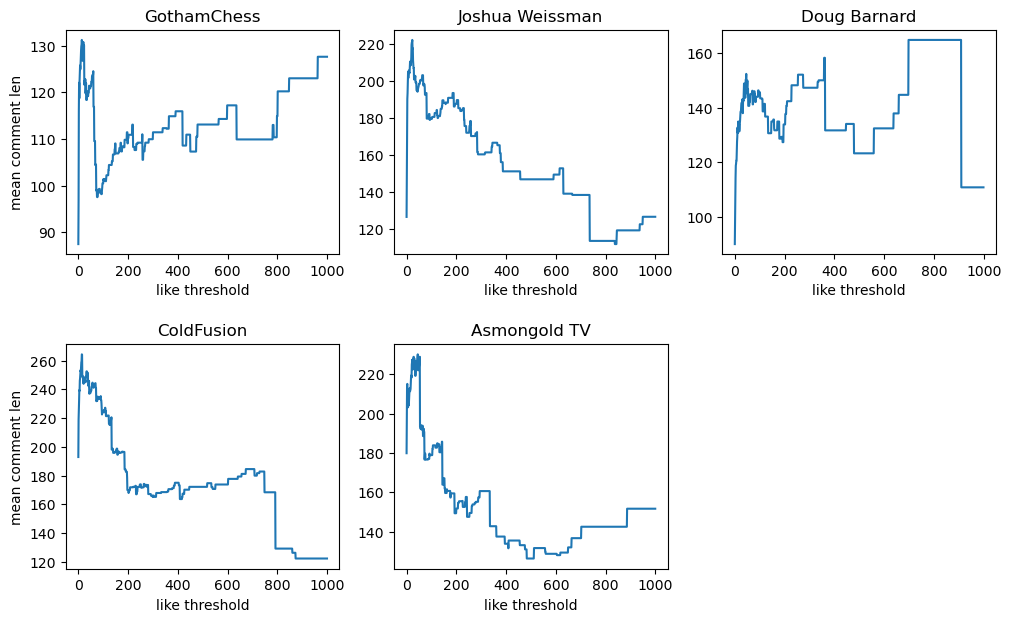

In [158]:
fig = plt.figure(figsize=(12,7))
plt.subplots_adjust(hspace = 0.4) 

add_graph_subplot(1, df_GothamChess.name, 'like threshold', 'mean comment len', y_data=GothamChess_mean_lens)
add_graph_subplot(2, df_JoshuaWeissman.name, 'like threshold', y_data=JoshuaWeissman_mean_lens)
add_graph_subplot(3, df_DougBarnard.name, 'like threshold', y_data=DougBarnard_mean_lens)
add_graph_subplot(4, df_ColdFusion.name, 'like threshold', 'mean comment len', y_data=ColdFusion_mean_lens)
add_graph_subplot(5, df_AsmongoldTV.name, 'like threshold', y_data=AsmongoldTV_mean_lens)

As we can see, there are three types of graphs: the mean length of comments either decreases, increases, or fluctuates on a constant level as the number of likes increases. Let's analyze each case. However, before we do that, I want to point out that there is one common feature of all the plots: an increase in the mean length of comments when like threshold goes from 0 to about 10. This is because there are many short, garbage comments on every channel, which significantly affect the average length, so I will be analyzing how the average value changes starting from 5-10 likes rather than 0.

1. There are three channels where the average comment length changes as I predicted. These are: Joshua Weissman, ColdFusion, and Asmongold TV. The more likes a comment has, the shorter it is on average. This is what I expected to happen. When people see a long comment, they often just don't have the patience to read it, even if it is interesting or deserves their attention. Even if a long comment is interesting, they may skip it and prefer to read shorter comments instead.


2. There is one channel, GothamChess, where the average comment length for comments with 5-50 likes is very high. Then, it drops and, around the 100-like threshold, reaches its minimum and then starts to increase again until the end. I was quite surprised to see this. My theory works well for the like range of 1-100, but for some reason, on this channel, people read long comments and like them. I think this is because comments on this channel are generally quite short, and long comments are not very common. As we saw earlier, there are two channels with almost the same average length of all comments: GothamChess and Doug Barnard, with 88 and 89 characters per comment, respectively. These numbers are much lower than those of the other three channels. Comments on the GothamChess channel are too short, and even relatively long ones are not long enough to discourage people from reading them.


3. There is one channel, Doug Barnard, where mean comment length for comments fluctuates around 130. I believe this is for the same reason as with GothamChess. The comments on this channel are on average short, around 89 words, so relatively long comments are still relatively short and can get a lot of attention.

<h2> 4.4 Is it true that more popular comments contain more unique words? </h2>

The most popular comments with the highest number of likes are interesting and creative, which is why people like them. These comments must be quite unique and comment on something special. Popular comments need to stand out from the rest, and to prove my hypothesis I will use frequency analysis.

Let's start by creating word clouds.

In [39]:
def create_wordcloud(df):
    comment_words = ''
    stop_words = stopwords.words('english') # use storwords from nltk.corpus

    # iterate through the comments
    for comment in df['comment']:

        # split the comment
        tokens = comment.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    # create wordcloud
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stop_words,
                    min_font_size = 10).generate(comment_words)
    
    return wordcloud

In [42]:
def add_wordcloud_subplot(n, df):
    ax = fig.add_subplot(2, 3, n) # add a wordcloud to the 2x3 grid at the nth position
    ax.title.set_text(df.name)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.imshow(create_wordcloud(df))

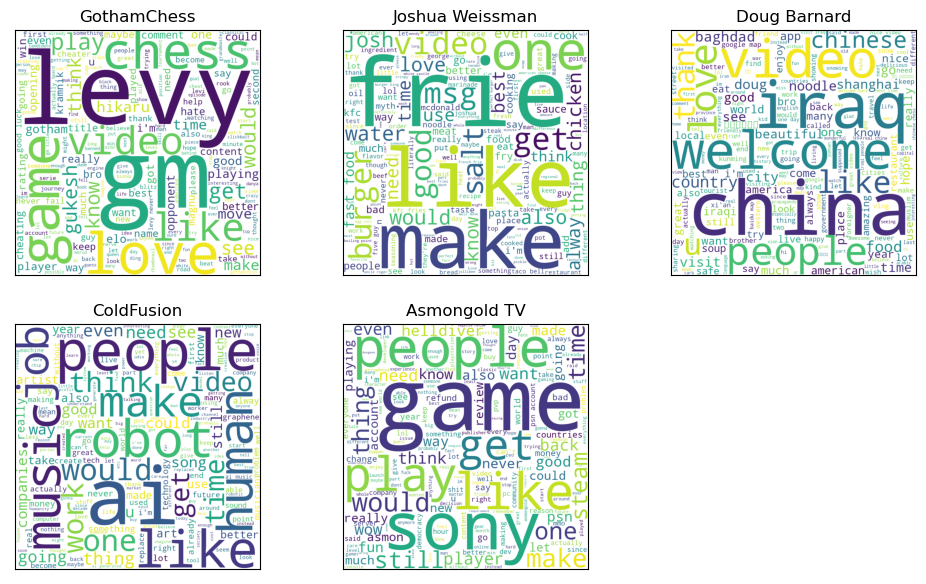

In [43]:
fig = plt.figure(figsize=(12,7))
plt.tight_layout(pad = 0)

add_wordcloud_subplot(1, df_GothamChess)
add_wordcloud_subplot(2, df_JoshuaWeissman)
add_wordcloud_subplot(3, df_DougBarnard)
add_wordcloud_subplot(4, df_ColdFusion)
add_wordcloud_subplot(5, df_AsmongoldTV)

Let's first calculate number of unique words relative to the number of all words in all coments of one channel. 

In [44]:
def word_process(df):
    
    # tokezine comments and put them into 2-dimensional list
    tokens = []
    for comment in df:
        words = word_tokenize(comment)
        tokens.append(words)
    
    # remove all non-words and convert words to lowercase
    cleaned_tokens = []
    for t in tokens:
        cleaned = [word.lower() for word in t if word.isalpha()]
        cleaned_tokens.append(cleaned)
    
    # remove stopwords using nltk.corpus.stopwords
    stop_words = stopwords.words('english')
    stopwords_removed_tokens = []
    for t in cleaned_tokens:
        cleaned = [word for word in t if not word in stop_words]
        stopwords_removed_tokens.append(cleaned)
    
    # lemmatize words 
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for t in stopwords_removed_tokens:
        cleaned = [lemmatizer.lemmatize(word) for word in t]
        lemmatized_tokens.append(cleaned)
    
    # count total number of words
    word_count = 0
    for t in lemmatized_tokens:
        word_count += len(t)
    return lemmatized_tokens, word_count

In [45]:
def get_freqDist(tokens):
    # flatten list of lists
    flat = []
    for i in tokens:
        flat += i
  
    return nltk.FreqDist(flat) # return frequency distribution of all words

In [46]:
def print_freq_stats(comments, title):
    tokens, word_count = word_process(comments)
    freqs = get_freqDist(tokens)
    print(title)
    print('Number of unique words:', len(freqs))
    print('Number of all words:', word_count)
    print('Number of unique words to all words:', len(freqs)/word_count)
    print('')

In [47]:
print_freq_stats(df_GothamChess['comment'], df_GothamChess.name)
print_freq_stats(df_JoshuaWeissman['comment'], df_JoshuaWeissman.name)
print_freq_stats(df_DougBarnard['comment'], df_DougBarnard.name)
print_freq_stats(df_ColdFusion['comment'], df_ColdFusion.name)
print_freq_stats(df_AsmongoldTV['comment'], df_AsmongoldTV.name)

GothamChess
Number of unique words: 5386
Number of all words: 39500
Number of unique words to all words: 0.13635443037974684

Joshua Weissman
Number of unique words: 11108
Number of all words: 133296
Number of unique words to all words: 0.08333333333333333

Doug Barnard
Number of unique words: 4708
Number of all words: 18562
Number of unique words to all words: 0.2536364615881909

ColdFusion
Number of unique words: 14782
Number of all words: 168173
Number of unique words to all words: 0.08789758165698418

Asmongold TV
Number of unique words: 8665
Number of all words: 73454
Number of unique words to all words: 0.11796498488850164



Here we can see numbers of unique words and proportion to all words for each channel. But I would like to know how these numbers change with like threshold increase. Let's plot this.

In [166]:
def word_freqs(df):
    freqs = [] # list of ratios of the number of unique words to all words for different like thresholds
    new_df = df.sort_values('like_count')
    mean_like_count = []
    for i in tqdm(range(500, len(new_df), 10)): # like threshold
        tokens, word_count = word_process(new_df.iloc[i-500:i]['comment'])
        freq = get_freqDist(tokens)
        freqs.append(len(freq)/word_count)
        mean_like_count.append(new_df.iloc[i-500:i]['like_count'].mean())
        
    freqs = pd.Series(freqs)
    return freqs, mean_like_count

In [167]:
GothamChess_freqs, GothamChess_mean_like_count = word_freqs(df_GothamChess)
JoshuaWeissman_freqs, JoshuaWeissman_mean_like_count = word_freqs(df_JoshuaWeissman)
DougBarnard_freqs, DougBarnard_mean_like_count = word_freqs(df_DougBarnard)
ColdFusion_freqs, ColdFusion_mean_like_count = word_freqs(df_ColdFusion)
AsmongoldTV_freqs, AsmongoldTV_mean_like_count = word_freqs(df_AsmongoldTV)

100%|██████████| 393/393 [00:44<00:00,  8.75it/s]


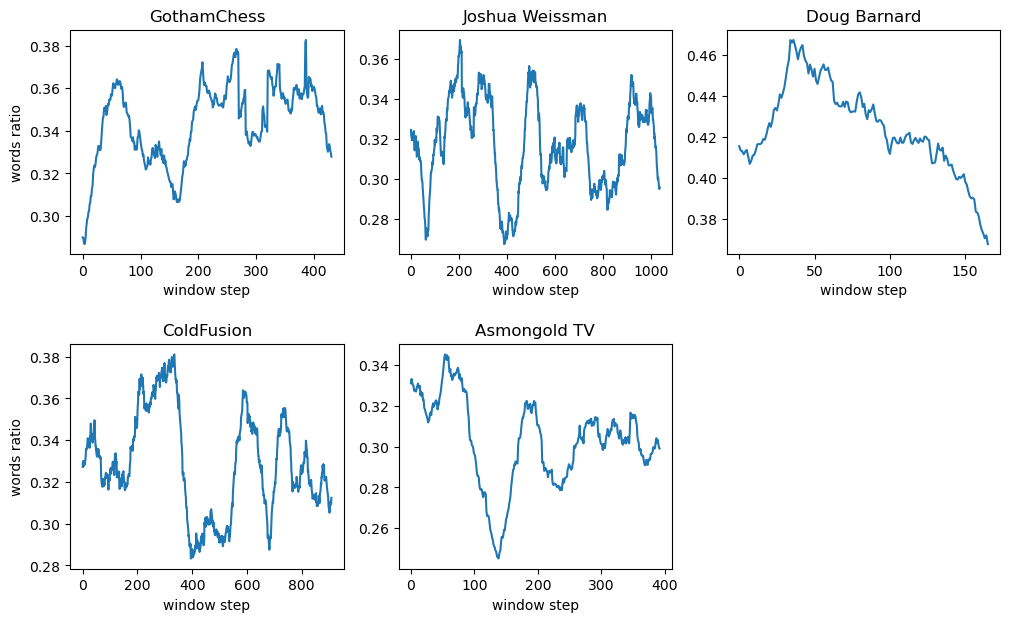

In [168]:
fig = plt.figure(figsize=(12,7))
plt.subplots_adjust(hspace = 0.4) 

add_graph_subplot(1, df_GothamChess.name, 'window step', 'words ratio', y_data=GothamChess_freqs)
add_graph_subplot(2, df_JoshuaWeissman.name, 'window step', y_data=JoshuaWeissman_freqs)
add_graph_subplot(3, df_DougBarnard.name, 'window step', y_data=DougBarnard_freqs)
add_graph_subplot(4, df_ColdFusion.name, 'window step', 'words ratio', y_data=ColdFusion_freqs)
add_graph_subplot(5, df_AsmongoldTV.name, 'window step', y_data=AsmongoldTV_freqs)

Down is the same plots as above but with x axis scaled by mean window like count

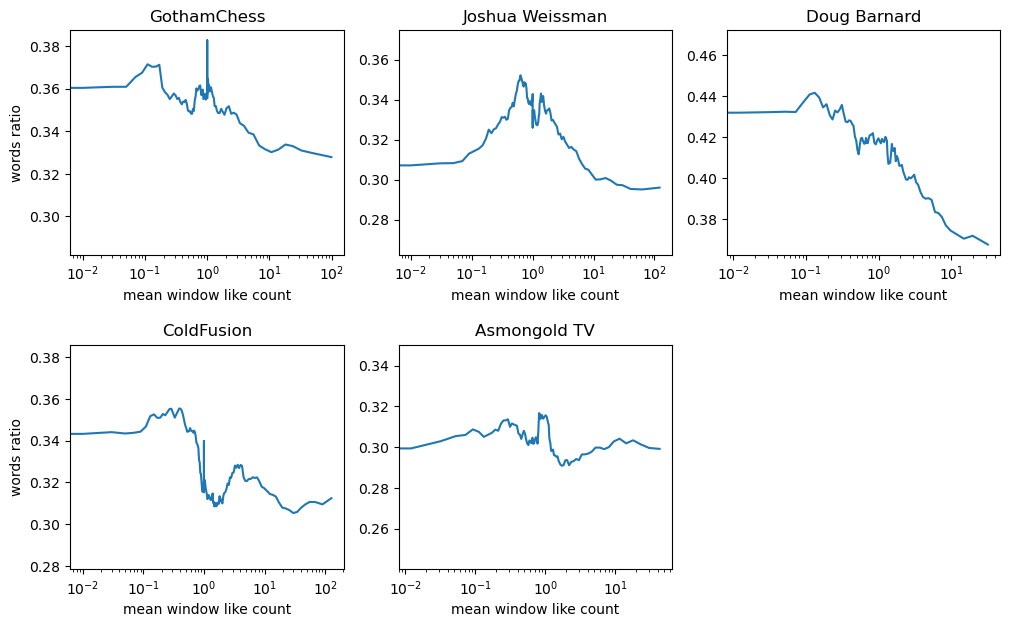

In [169]:
fig = plt.figure(figsize=(12,7))
plt.subplots_adjust(hspace = 0.4)

add_graph_subplot(1, 'GothamChess', 'mean window like count', 'words ratio', 
                  x_data=GothamChess_mean_like_count, y_data=GothamChess_freqs, xscale='log')
add_graph_subplot(2, 'Joshua Weissman', 'mean window like count', 
                  x_data=JoshuaWeissman_mean_like_count, y_data=JoshuaWeissman_freqs, xscale='log')
add_graph_subplot(3, 'Doug Barnard', 'mean window like count', 
                  x_data=DougBarnard_mean_like_count, y_data=DougBarnard_freqs, xscale='log')
add_graph_subplot(4, 'ColdFusion', 'mean window like count', 'words ratio', 
                  x_data=ColdFusion_mean_like_count, y_data=ColdFusion_freqs, xscale='log')
add_graph_subplot(5, 'Asmongold TV', 'mean window like count', 
                  x_data=AsmongoldTV_mean_like_count, y_data=AsmongoldTV_freqs, xscale='log')

In [170]:
def add_regplot_subplot(n, title, x_label, y_label, data):
    fig.add_subplot(2, 3, n) # add a subplot to the 2x3 grid at the nth position
    ax = sns.regplot(pd.Series(range(len(data))), data, ci=None, line_kws={'color':'green'})
    ax.title.set_text(title)
    ax.xaxis.set_label_text(x_label)
    ax.yaxis.set_label_text(y_label)

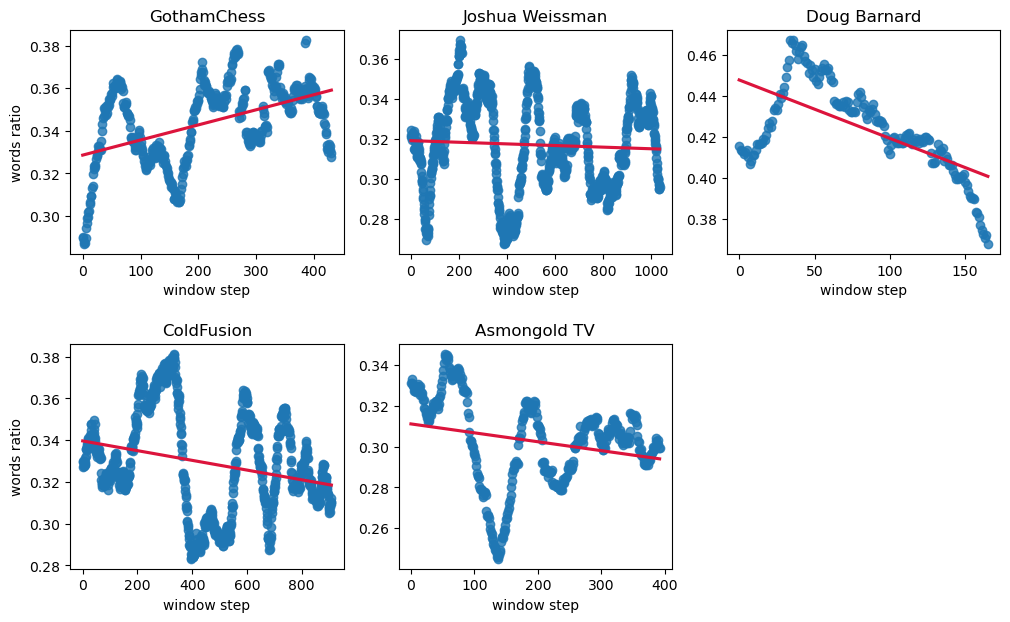

In [171]:
fig = plt.figure(figsize=(12,7))
plt.subplots_adjust(hspace = 0.4) 

f(1, df_GothamChess.name, 'window step', 'words ratio', data=GothamChess_freqs)
f(2, df_JoshuaWeissman.name, 'window step', data=JoshuaWeissman_freqs)
f(3, df_DougBarnard.name, 'window step', data=DougBarnard_freqs)
f(4, df_ColdFusion.name, 'window step', 'words ratio', data=ColdFusion_freqs)
f(5, df_AsmongoldTV.name, 'window step', data=AsmongoldTV_freqs)

At first, the comments are sorted by the "like_count", and a window of 500 comments moves, calculating the unique word ratio in the 500 comments. As the window moves, the average number of likes for the comments in it increases. At the beginning, the window covers the first 500 comments with no likes, and at the end of the graph, the window contains comments with the highest number of likes.

However, there is not much to analyse from the graphs. We can see that the ratio of the number of unique words to the total number of words in the window does not increase with the mean like count increase. Оn the contrary, as we can see from the regplots on the three graphs number of unique words decreases with mean like count increase in the window. This suggests that my theory is incorrect. I guess that popular comments do not use as many unique words as I originally thought. They seems creative and interesting for other reasons.

There is a last chance to discover something interesting in the word frequency distribution. I will analyze the most popular words based on different like thresholds. If my initial hypothesis is correct, we will see that the most common words will be different for comments with 0+ likes and comments with 200+ likes.

In [172]:
def get_freq(tokens, word_count):
    # Flatten list of lists
    flat = []
    for i in tokens:
        flat += i
        
    # Get freq distribution of 15 most frequent tokens
    f = nltk.FreqDist(flat).most_common(15)
    freqs = dict()
    for pair in f:
        freqs[pair[0]] = float(pair[1]) / word_count
    
    return freqs

In [173]:
def plotfreqs(df):
    # create ans setup plotting space
    f = plt.figure(figsize=(12,6))
    plt.subplots_adjust(hspace = 0.5) 
    f.suptitle(df.name, fontsize=20)
    # plot 4 barcharts
    for i in range(4):
        # get word frequencies for comments with like count > i*200
        tokens, word_count = word_process(df[df['like_count'] > i*200]['comment'])
        freqs = get_freq(tokens, word_count)
        
        ax = plt.subplot(2, 2, i+1)
        ax.xaxis.set_tick_params(rotation=45, labelsize=10)
        ax.set_title('> '+str(i*200)+' likes')
        plt.bar(freqs.keys(), freqs.values())
    
    plt.show() 

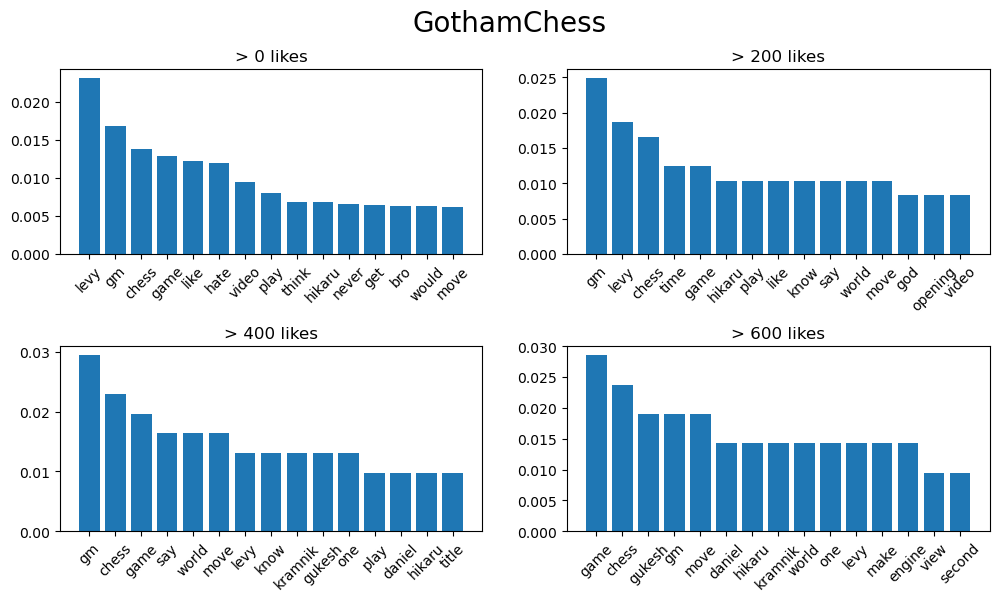

In [174]:
plotfreqs(df_GothamChess)

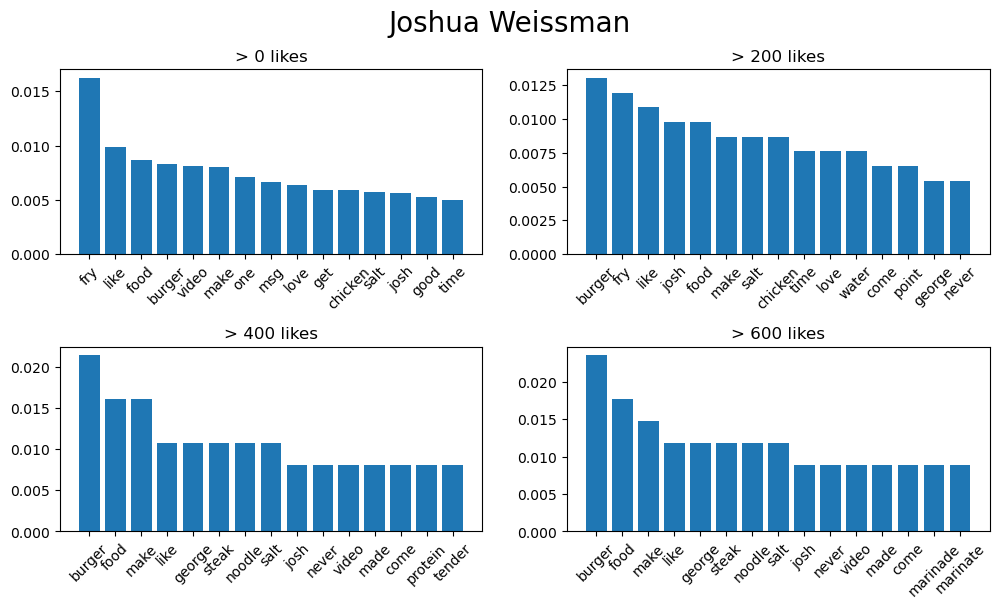

In [175]:
plotfreqs(df_JoshuaWeissman)

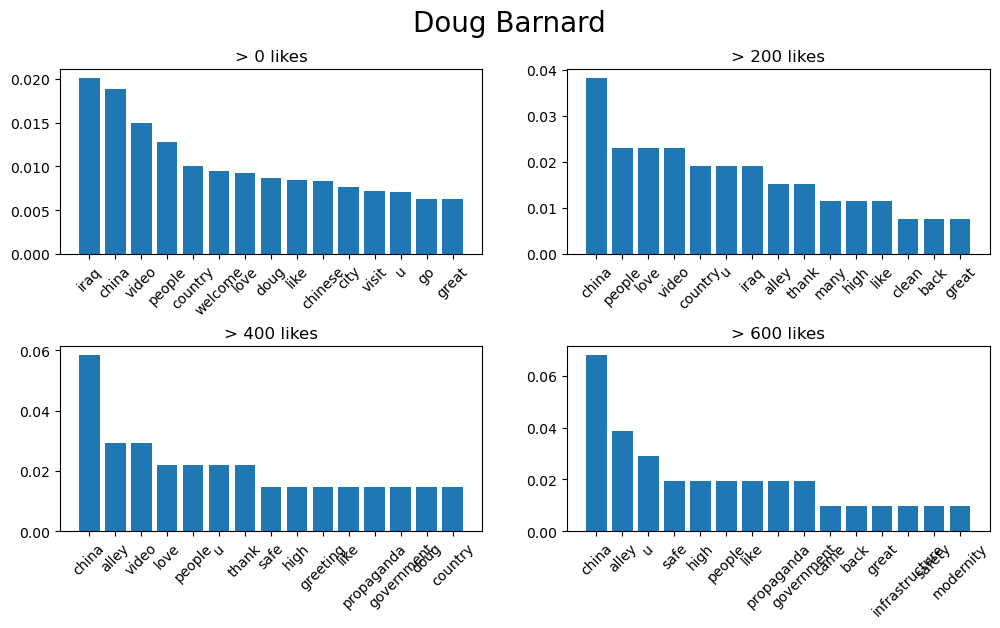

In [176]:
plotfreqs(df_DougBarnard)

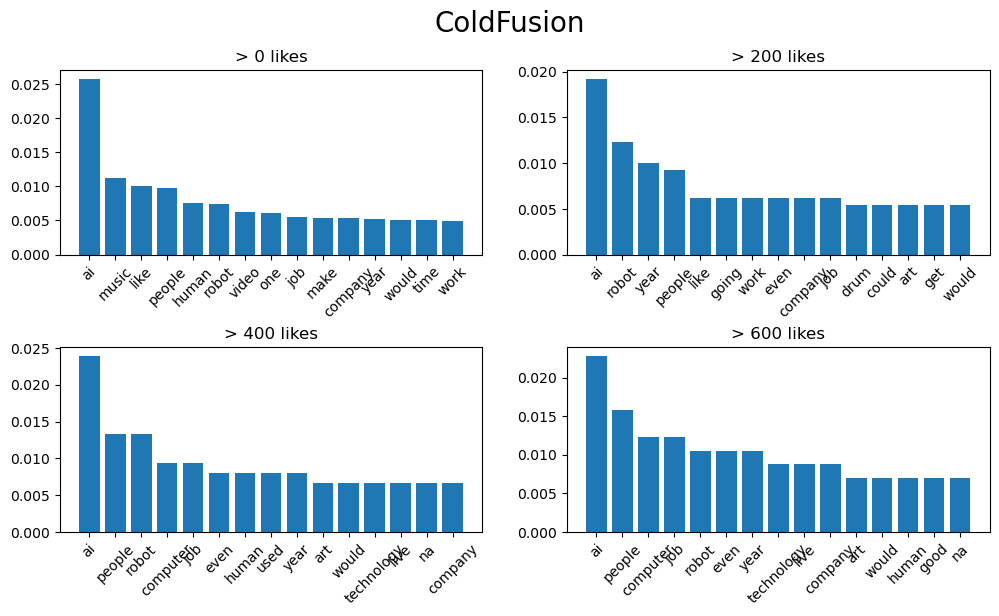

In [177]:
plotfreqs(df_ColdFusion)

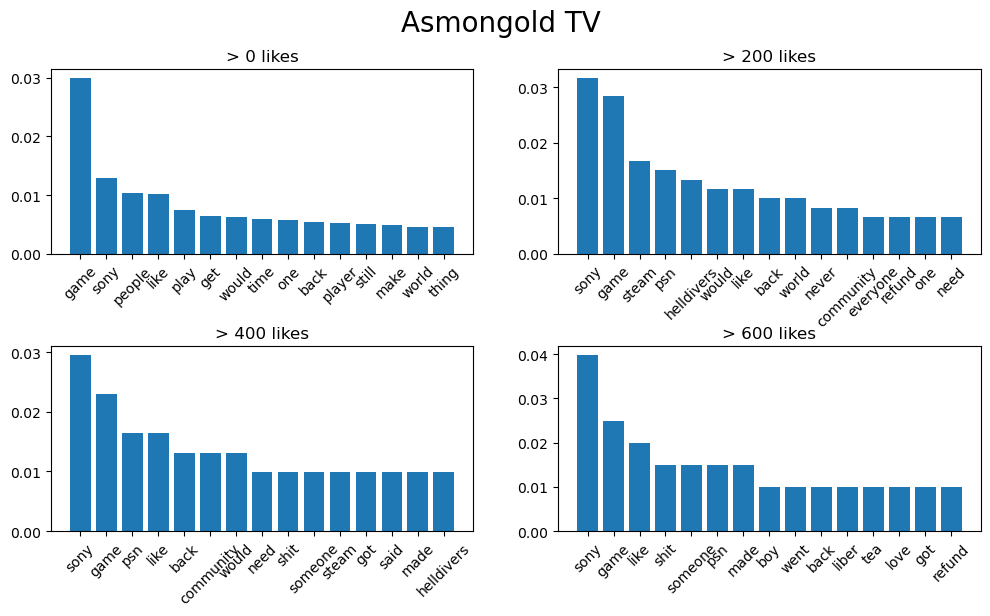

In [178]:
plotfreqs(df_AsmongoldTV)

As we can see from the data, most frequent words in comments are similar regardless of the number of likes they have. 

Based on the analysis of unique and popular words, it can be concluded that there is no significant difference in the lexicon between comments with a large number of likes and those with fewer.

<h2> 4.5 Is it true that positive comments receive more likes on average than negative comments? </h2> 

It is logically intuitive to assume that positive comments have more likes than negative comments if a video is not bad. If the majority of people like a video, the majority will also like positive comments. All of the videos I have selected have an average number of likes and views on their channels, so I believe that the majority of the video audience will like them and I expect my theory to be correct. I will test it using sentiment analysis models. I will use two models: NLTK's Sentiment Intensity Analysis model and the Hugging Face's sentiment analysis model. This will allow me to compare the results of the two models and get more reliable data.

In [183]:
def print_sentiment_stats(df):
    print('All positive or negative comments are used \n')
    print('NLTK SentimentIntensityAnalyzer model')
    print('Mean number of likes for positive comments: ', df[df['polarity_score_1'] > 0]['like_count'].mean())
    print('Mean number of likes for negative comments: ', df[df['polarity_score_1'] < 0]['like_count'].mean())
    print('Ration of positive to negative comments: ', 
          df[df['polarity_score_1'] > 0]['like_count'].mean()/df[df['polarity_score_1'] < 0]['like_count'].mean())
    
    print('Hugging Face sentiment-analysis model')
    print('Mean number of likes for positive comments: ', df[df['polarity_score_2'] > 0]['like_count'].mean())
    print('Mean number of likes for negative comments: ', df[df['polarity_score_2'] < 0]['like_count'].mean())
    print('Ration of positive to negative comments: ', 
          df[df['polarity_score_2'] > 0]['like_count'].mean()/df[df['polarity_score_2'] < 0]['like_count'].mean())
    print()

In [184]:
def print_sentiment_stats_2(df):
    print('Comments with at least 1 like are used \n')
    print('NLTK SentimentIntensityAnalyzer model')
    print('Mean number of likes for positive comments: ', df.loc[(df['polarity_score_1'] > 0) & (df['like_count'] > 0)]['like_count'].mean())
    print('Mean number of likes for negative comments: ', df.loc[(df['polarity_score_1'] < 0) & (df['like_count'] > 0)]['like_count'].mean())
    print('Ration of positive to negative comments: ', 
          df.loc[(df['polarity_score_1'] > 0) & (df['like_count'] > 0)]['like_count'].mean() /
          df.loc[(df['polarity_score_1'] < 0) & (df['like_count'] > 0)]['like_count'].mean())
        
    print('Hugging Face sentiment-analysis model')
    print('Mean number of likes for positive comments: ', df.loc[(df['polarity_score_2'] > 0) & (df['like_count'] > 0)]['like_count'].mean())
    print('Mean number of likes for negative comments: ', df.loc[(df['polarity_score_2'] < 0) & (df['like_count'] > 0)]['like_count'].mean())
    print('Ration of positive to negative comments: ', 
          df.loc[(df['polarity_score_2'] > 0) & (df['like_count'] > 0)]['like_count'].mean() /
          df.loc[(df['polarity_score_2'] < 0) & (df['like_count'] > 0)]['like_count'].mean())
    print()

There are two means that are calculated. The first is the mean of positive and negative comments, regardless of the number of likes each comment has. The second is the mean of comments that have one or more likes. Because comments with likes are more likely to be meaningful, it would be interesting to see how many negative comments are ignored and how the proportions differ between the two comment subsets.

In [185]:
print_sentiment_stats(df_GothamChess)
print_sentiment_stats_2(df_GothamChess)

All positive or negative comments are used 

NLTK SentimentIntensityAnalyzer model
Mean number of likes for positive comments:  11.887461231723528
Mean number of likes for negative comments:  9.992090395480226
Ration of positive to negative comments:  1.1896871186334188
Hugging Face sentiment-analysis model
Mean number of likes for positive comments:  12.656592203241349
Mean number of likes for negative comments:  10.143148450244698
Ration of positive to negative comments:  1.247797196829552

Comments with at least 1 like are used 

NLTK SentimentIntensityAnalyzer model
Mean number of likes for positive comments:  60.15695067264574
Mean number of likes for negative comments:  45.11734693877551
Ration of positive to negative comments:  1.3333441515140296
Hugging Face sentiment-analysis model
Mean number of likes for positive comments:  59.948132780082986
Mean number of likes for negative comments:  50.86094069529652
Ration of positive to negative comments:  1.1786674009674152



In [186]:
print_sentiment_stats(df_JoshuaWeissman)
print_sentiment_stats_2(df_JoshuaWeissman)

All positive or negative comments are used 

NLTK SentimentIntensityAnalyzer model
Mean number of likes for positive comments:  6.578835364674018
Mean number of likes for negative comments:  6.641452344931921
Ration of positive to negative comments:  0.9905717940887302
Hugging Face sentiment-analysis model
Mean number of likes for positive comments:  6.97012880241162
Mean number of likes for negative comments:  5.879049676025918
Ration of positive to negative comments:  1.1855876691831668

Comments with at least 1 like are used 

NLTK SentimentIntensityAnalyzer model
Mean number of likes for positive comments:  40.971084337349396
Mean number of likes for negative comments:  54.875
Ration of positive to negative comments:  0.7466256826851826
Hugging Face sentiment-analysis model
Mean number of likes for positive comments:  39.5552099533437
Mean number of likes for negative comments:  52.21227621483376
Ration of positive to negative comments:  0.7575844766964187



In [187]:
print_sentiment_stats(df_DougBarnard)
print_sentiment_stats_2(df_DougBarnard)

All positive or negative comments are used 

NLTK SentimentIntensityAnalyzer model
Mean number of likes for positive comments:  9.566607460035524
Mean number of likes for negative comments:  21.941747572815533
Ration of positive to negative comments:  0.43600025149719424
Hugging Face sentiment-analysis model
Mean number of likes for positive comments:  10.601195559350982
Mean number of likes for negative comments:  8.59417273673257
Ration of positive to negative comments:  1.2335329861407305

Comments with at least 1 like are used 

NLTK SentimentIntensityAnalyzer model
Mean number of likes for positive comments:  21.544
Mean number of likes for negative comments:  49.67032967032967
Ration of positive to negative comments:  0.43373982300884956
Hugging Face sentiment-analysis model
Mean number of likes for positive comments:  22.988888888888887
Mean number of likes for negative comments:  22.26145552560647
Ration of positive to negative comments:  1.0326768104828403



In [188]:
print_sentiment_stats(df_ColdFusion)
print_sentiment_stats_2(df_ColdFusion)

All positive or negative comments are used 

NLTK SentimentIntensityAnalyzer model
Mean number of likes for positive comments:  9.308612440191387
Mean number of likes for negative comments:  9.362737642585552
Ration of positive to negative comments:  0.9942190837273939
Hugging Face sentiment-analysis model
Mean number of likes for positive comments:  8.316062176165802
Mean number of likes for negative comments:  11.104385822948696
Ration of positive to negative comments:  0.7488988863282784

Comments with at least 1 like are used 

NLTK SentimentIntensityAnalyzer model
Mean number of likes for positive comments:  46.52282608695652
Mean number of likes for negative comments:  48.47244094488189
Ration of positive to negative comments:  0.9597789007543012
Hugging Face sentiment-analysis model
Mean number of likes for positive comments:  41.84357541899441
Mean number of likes for negative comments:  56.333333333333336
Ration of positive to negative comments:  0.7427853624673564



In [189]:
print_sentiment_stats(df_AsmongoldTV)
print_sentiment_stats_2(df_AsmongoldTV)

All positive or negative comments are used 

NLTK SentimentIntensityAnalyzer model
Mean number of likes for positive comments:  19.485795454545453
Mean number of likes for negative comments:  8.557365439093484
Ration of positive to negative comments:  2.277078803427806
Hugging Face sentiment-analysis model
Mean number of likes for positive comments:  27.113846153846154
Mean number of likes for negative comments:  6.563732394366197
Ration of positive to negative comments:  4.1308579516615564

Comments with at least 1 like are used 

NLTK SentimentIntensityAnalyzer model
Mean number of likes for positive comments:  96.83294117647058
Mean number of likes for negative comments:  42.24825174825175
Ration of positive to negative comments:  2.291998773191309
Hugging Face sentiment-analysis model
Mean number of likes for positive comments:  136.09266409266408
Mean number of likes for negative comments:  33.051418439716315
Ration of positive to negative comments:  4.117604342484981



1. Gotham Cheese and Asmongold TV have a ratio of positive to negative comments, as I predicted, with positive comments having more likes than negative ones. Both models unanimous in this.

2. For the other channels, the number of likes on positive comments is either equal to or slightly less than the mean number of likes for negative comments.

Based on these statistics, it can be concluded that my theory was incorrect. It seems that not all popular comments are positive. Some may be neutral, yet they still contain interesting information or discussions. The majority of comments on ColdFusion focus on technology and the future, and are neither positive nor negative. Joshua Weissman's channel is about food, and the main topics of discussion are recipes, ingredients, and cooking tips. These comments are neither negative nor positive, so the ratios do not support my hypothesis.

<h1> 5. Conclusion </h1>

Now, the questions that I asked at the beginning of my project can be answered.

**What is the average length of comments in each channel?**

* GothamChess:  87.5
* Joshua Weissman:  126.5
* Doug Barnard:  90.0
* ColdFusion:  193.0
* Asmongold TV:  180.0

The channel with the longest comments covers complicated topics related to technology, IT, and the future. People who watch ColdFusion are highly engaged in discussions and are willing to spend time writing comments.

The shortest comments are on the GothamChess channel. I am still not sure why people who watch this channel do not want to leave long comments. Perhaps it has something to do with the nature of chess, or maybe it's the style of video content that attracts people who don't want to write long comments.

**What is the average length of the most popular comments in each channel?**

* GothamChess: 110.0
* Joshua Weissman: 188.0
* Doug Barnard: 134.0
* ColdFusion: 170.0
* Asmongold TV: 152.0

These numbers are difficult to analyze, as the average comment length depends heavily on the chosen like threshold. However, one interesting trend can be observed: the average comment lengths have become closer to each other. This suggests that the distribution of popular comment lengths has a smaller variance than that of all comments.

**Is it true that, on average, shorter comments are more popular than longer ones?**

Yes, but only if the comments are not too short. Shorter comments receive more likes, but only if the longer comments are quite long. In this case, some people may not want to read the longer comments and may not give them their likes. We noticed that, when the average number of characters in a comment on the channel is around 87 or 90 characters, popular comments are not significantly longer or shorter than the average. However, when the comments on the channel are quite long, averaging around 193 or 180 characters, in this case, shorter comments receive more likes.

**Is it true that more popular comments contain more unique words?**

No, that is not true. I have attempted to use frequency analysis and calculate the unique word ratio, but none of these methods have shown that there is a significant difference between the vocabulary of comments with a high number of likes and those with a low number of likes.

**Is it true that positive comments receive more likes on average than negative comments?**

No, it is also not true. Comments with a lot of likes are not always positive. They often focus on something that other people are interested in, and it can be difficult to determine whether this comment is positive or not.

<h1> 6. References </h1>

Download comments for YouTube via API: https://medium.com/this-code/how-to-make-a-youtube-video-comments-dataset-with-the-googles-python-api-34cf32a14d16

Text preprocessing and frequency analysis: https://www.coursera.org/learn/uol-cm2015-programming-with-data/ungradedLab/ebsTf/revision-lab-3-pre-processing-text